# Adam Pithenwala

13/02/2023

## Problem Statement

#### This data is about the amount spend on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sells and is there way to optimize that sell.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [106]:
data = pd.read_csv('./Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [107]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [108]:
data.shape

(200, 5)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [110]:
data.isna().sum() # provides the number of null values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

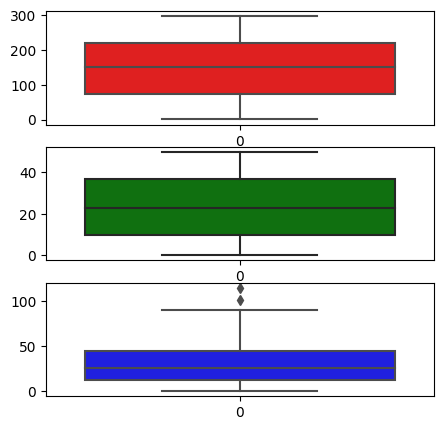

In [111]:
fig,axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(data['TV'], ax=axs[0], color='red')
plt2 = sns.boxplot(data["radio"], ax=axs[1], color='green')
plt3 = sns.boxplot(data["newspaper"], ax=axs[2], color='blue')

#### By Looking into the box plot we can see that there are outliers in Newspaper data set and no outlier in TV and Radio data set

<AxesSubplot: xlabel='newspaper', ylabel='sales'>

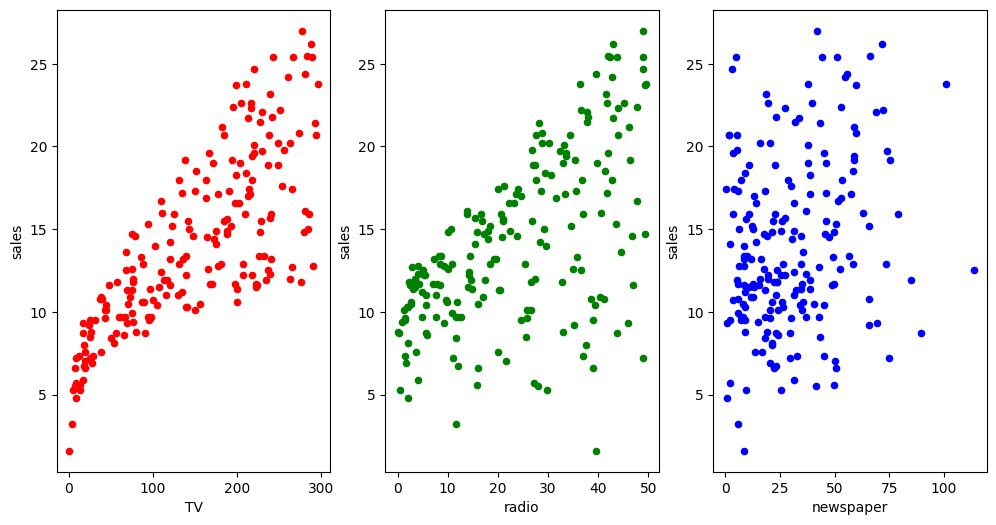

In [112]:
fig,axs = plt.subplots(1,3)
data.plot(kind='scatter', x='TV', y='sales', color='red', ax=axs[0], figsize=(12,6))
data.plot(kind='scatter', x='radio', y='sales', color='green', ax=axs[1], figsize=(12,6))
data.plot(kind='scatter', x='newspaper', y='sales', color='blue', ax=axs[2], figsize=(12,6))

## Linear Regression Model

In [113]:
# create features and labels
x = data[['TV']]
y = data.sales

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [116]:
print(lm.intercept_)

7.032593549127695


In [117]:
print(lm.coef_)

[0.04753664]


In [118]:
%%capture --no-display
lm.predict([[50]])

array([9.40942557])

In [119]:
from sklearn.metrics import r2_score

In [120]:
z = lm.predict(x)

In [121]:
r2_score(y_true=y,y_pred=z)

0.611875050850071

In [122]:
from sklearn.metrics import mean_absolute_error

In [123]:
m = lm.predict(x)
mean_absolute_error(y_true=y,y_pred=z)

2.549806038927486

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
ms = lm.predict(x)
mean_squared_error(y_true=y,y_pred=ms)

10.512652915656757

In [126]:
import math
ms=lm.predict(x)
mse=mean_squared_error(y_true=y,y_pred=ms)
rmse=math.sqrt(mse)
rmse

3.2423221486546887

In [127]:
x1 = data[['newspaper']]
y = data.sales
lm = LinearRegression()
lm.fit(x1,y)

LinearRegression()

In [128]:
print(lm.intercept_)
print(lm.coef_)

12.35140706927816
[0.0546931]


In [129]:
%%capture --no-display
lm.predict([[50]])

array([15.08606199])

In [130]:
z=lm.predict(x1)
r2_score(y_true=y,y_pred=z)

0.05212044544430516

In [131]:
m=lm.predict(x1)
mean_absolute_error(y_true=y,y_pred=m)

4.1465597438384885

In [132]:
ms=lm.predict(x1)
mean_squared_error(y_true=y,y_pred=ms)

25.674022720559698

In [133]:
ms=lm.predict(x1)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse =math.sqrt(mse)
rmse

5.066953988399707

In [134]:
x2 = data[['radio']]
y = data.sales
lm = LinearRegression()
lm.fit(x2,y)

LinearRegression()

In [135]:
print(lm.intercept_)
print(lm.coef_)

9.311638095158283
[0.20249578]


In [136]:
%%capture --no-display
lm.predict([[50]])

array([19.43642726])

In [137]:
z=lm.predict(x2)
r2_score(y_true=y,y_pred=z)

0.33203245544529525

In [138]:
m=lm.predict(x2)
mean_absolute_error(y_true=y,y_pred=m)

3.3202187976420663

In [139]:
ms=lm.predict(x2)
mean_squared_error(y_true=y,y_pred=ms)

18.09239774512544

In [140]:
ms=lm.predict(x2)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse =math.sqrt(mse)
rmse

4.2535159274564185

In [141]:
Xm=data[['TV','newspaper','radio']]
y = data.sales
lm = LinearRegression()
lm.fit(Xm,y)

LinearRegression()

In [142]:
print("Intercept :- ",lm.intercept_)
print("Coef_TV :- ",lm.coef_[0])
print("Coef_newspaper :- ",lm.coef_[1])
print("Coef_radio :- ",lm.coef_[2])

Intercept :-  2.938889369459412
Coef_TV :-  0.0457646454553976
Coef_newspaper :-  -0.0010374930424763146
Coef_radio :-  0.18853001691820442


In [143]:
%%capture --no-display
lm.predict([[50,50,50]])

array([14.60174784])

In [144]:
z = lm.predict(Xm)
r2_score(y_true=y,y_pred=z)

0.8972106381789521

In [145]:
z = lm.predict(Xm)
r2_score(y_true=y,y_pred=z)

0.8972106381789521

In [146]:
m = lm.predict(Xm)
mean_absolute_error(y_true=y,y_pred=m)

1.2520112296870685

In [147]:
ms = lm.predict(Xm)
mean_squared_error(y_true=y,y_pred=ms)

2.784126314510937

In [148]:
ms=lm.predict(Xm)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse =math.sqrt(mse)
rmse

1.66857014072257

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3, random_state=42)
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [150]:
lm.fit(X_train,Y_train)

LinearRegression()

In [151]:
y_pred = lm.predict(X_test)
y_pred

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864,
       10.72468577, 17.30067133,  9.55984994, 17.56055502, 15.36546598,
        8.7013056 ,  9.84757831, 18.12208943,  7.49006196, 13.71334823,
       15.13806775,  7.57823679, 16.40964153, 10.73396733, 18.25667206,
       17.89005042, 10.38590882,  9.00295631, 18.88317738, 10.44159818,
        9.72227724, 17.14752559, 13.70406667, 11.28622018,  7.62928537,
       16.5117387 , 10.45087974, 16.46997167,  8.02375169, 20.26612989,
       18.2937983 ,  9.48095667, 19.94127527, 12.67845424,  8.51567439,
       12.62276488, 15.45364081,  9.2396361 , 10.1306659 , 17.63480751,
        9.01223787, 10.51585066, 14.07532908, 12.09371593, 10.78037513,
       10.86854996, 15.05453371,  7.64320771,  7.60144069, 10.78501591,
       13.24462943, 10.64579251, 20.68380011,  8.14905275, 16.40964153])

## Linear Regression for TV : -

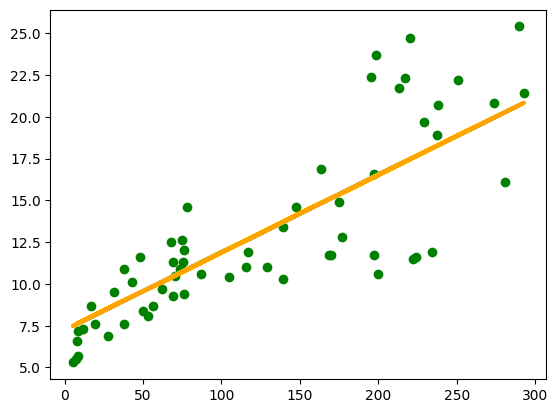

In [232]:
plt.scatter(X_test,Y_test, color="green")
plt.plot(X_test,y_pred,color="orange",linewidth=3)

## Linear Regression for Newspaper :-

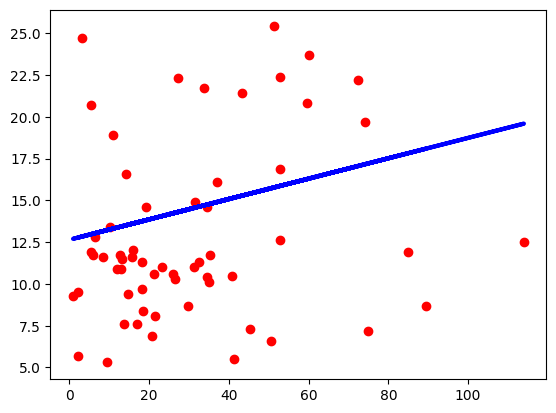

In [233]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1,y,test_size=0.3, random_state=42)
lm.fit(X1_train,Y1_train)
y1_pred = lm.predict(X1_test)
plt.scatter(X1_test,Y1_test, color="red")
plt.plot(X1_test,y1_pred,color="blue",linewidth=3)

## Linear Regression for Radio :-

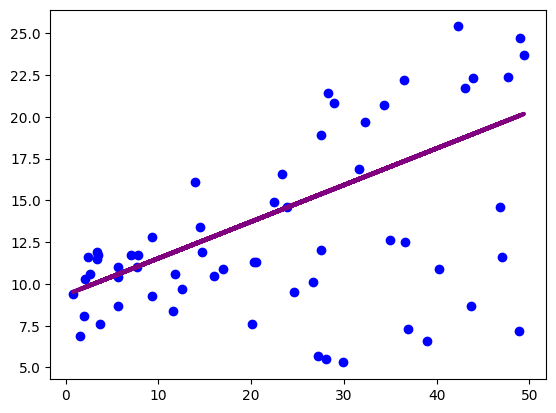

In [234]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2,y,test_size=0.3, random_state=42)
lm.fit(X2_train,Y2_train)
y2_pred = lm.predict(X2_test)
plt.scatter(X2_test,Y2_test, color="blue")
plt.plot(X2_test,y2_pred,color="purple",linewidth=3)

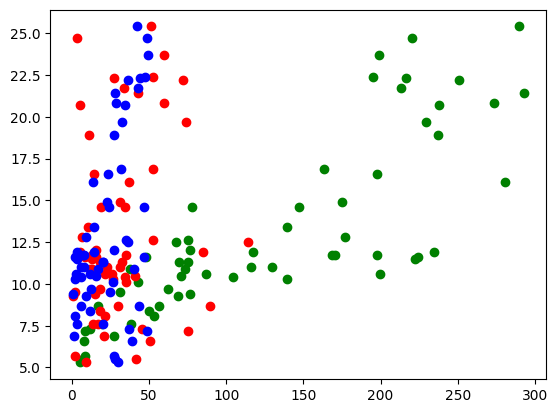

In [235]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm,y,test_size=0.3, random_state=42)
lm.fit(Xm_train,Ym_train)
ym_pred = lm.predict(Xm_test)
plt.scatter(Xm_test['TV'],Ym_test, color="green")
plt.scatter(Xm_test['newspaper'],Ym_test, color="red")
plt.scatter(Xm_test['radio'],Ym_test, color="blue")

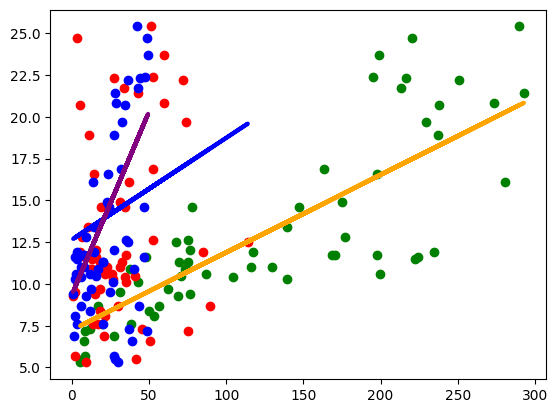

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3, random_state=42)
lm.fit(X_train,Y_train)
y_pred = lm.predict(X_test)
plt.scatter(X_test,Y_test, color="green")
plt.plot(X_test,y_pred,color="orange",linewidth=3)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1,y,test_size=0.3, random_state=42)
lm.fit(X1_train,Y1_train)
y1_pred = lm.predict(X1_test)
plt.scatter(X1_test,Y1_test, color="red")
plt.plot(X1_test,y1_pred,color="blue",linewidth=3)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2,y,test_size=0.3, random_state=42)
lm.fit(X2_train,Y2_train)
y2_pred = lm.predict(X2_test)
plt.scatter(X2_test,Y2_test, color="blue")
plt.plot(X2_test,y2_pred,color="purple",linewidth=3)